In [1]:
import os
import pandas as pd

from SyntheticGAN import encode_categorical, generate_synthetic_data_GAN
from SyntheticVAE import generate_synthetic_data_VAE
from Comparison_plots import compare_correlation_matrices, plot_bivariate, plot_univariate
from Privacy import evaluate_mia, evaluate_targeted_mia
from Utility import linear_regression, compare_models


In [2]:
filepath = os.path.realpath('')
originaldir = os.path.join(filepath, "Data", "original_train_data.xlsx")
outputdatadir_VAE= synvaedir = os.path.join(filepath, "Data", "synthetic_VAE_data.xlsx")
outputdatadir_GAN = syngandatadir = os.path.join(filepath, "Data", "synthetic_GAN_data.xlsx")
testdir = os.path.join(filepath, "Data", "test_data.xlsx")

df = pd.read_excel(originaldir)
df = encode_categorical(df)

c:\Users\friev\anaconda3\envs\BDAcourse\Lib\site-packages\sdv\single_table\base.py:126: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
c:\Users\friev\anaconda3\envs\BDAcourse\Lib\site-packages\sdv\single_table\base.py:105: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
c:\Users\friev\anaconda3\envs\BDAcourse\Lib\site-packages\sdv\single_table\base.py:105: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


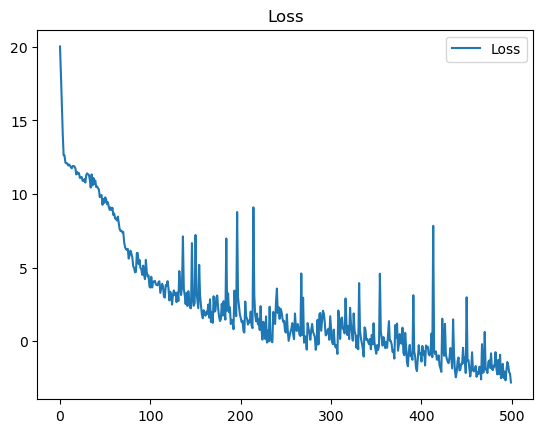

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 7/7 [00:00<00:00, 206.44it/s]|
Column Shapes Score: 96.42%

(2/2) Evaluating Column Pair Trends: |██████████| 21/21 [00:00<00:00, 137.59it/s]|
Column Pair Trends Score: 93.9%

Overall Score (Average): 95.16%



In [3]:
# generate synthetic data
## generate and save GAN synthetic data
synthetic = generate_synthetic_data_GAN(df, epochs = 10)
synthetic.to_excel(outputdatadir_GAN, index=False)


## generate and save VAE synthetic data
synthetic = generate_synthetic_data_VAE(df, visualize_loss = True, evaluation = True)
synthetic.to_excel(outputdatadir_VAE, index=False)

In [7]:
original = pd.read_excel(originaldir)
synGAN = pd.read_excel(syngandatadir)  #GAN
synVAE = pd.read_excel(synvaedir)
test = pd.read_excel(testdir)

c:\Users\friev\OneDrive - UGent\MaStat\Big Data Science\Big Data Algorithms\group work\Project-BDA\Comparison_plots.py:159: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


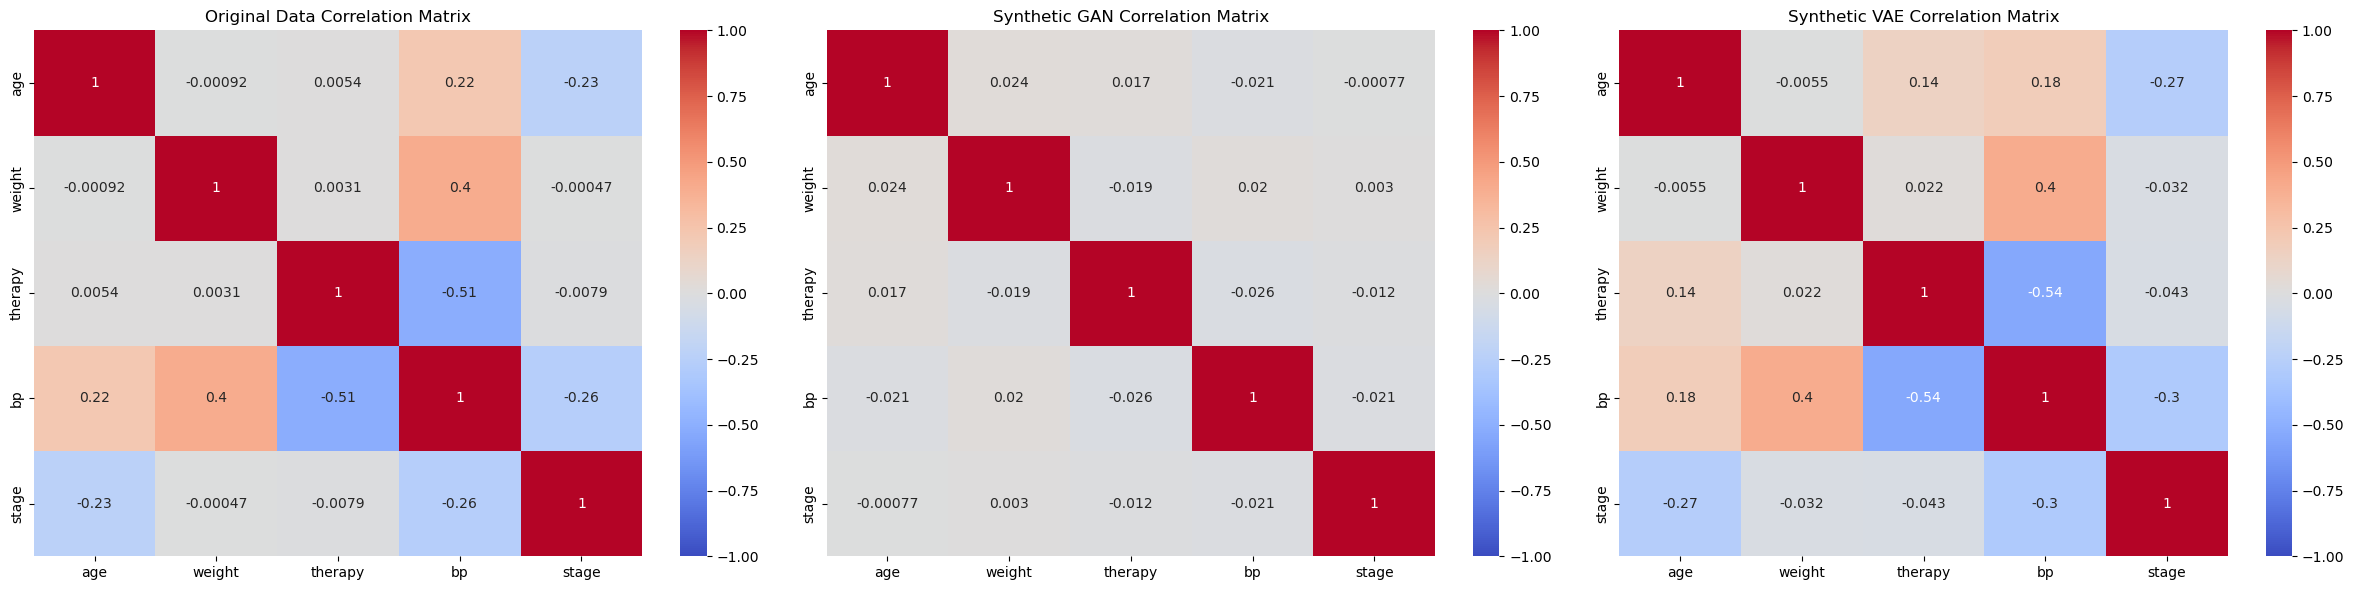

In [8]:
## evaluate similarity
compare_correlation_matrices(original, synGAN, synVAE)


UNIVARIATE PLOTS


c:\Users\friev\OneDrive - UGent\MaStat\Big Data Science\Big Data Algorithms\group work\Project-BDA\Comparison_plots.py:48: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
c:\Users\friev\OneDrive - UGent\MaStat\Big Data Science\Big Data Algorithms\group work\Project-BDA\Comparison_plots.py:48: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
c:\Users\friev\OneDrive - UGent\MaStat\Big Data Science\Big Data Algorithms\group work\Project-BDA\Comparison_plots.py:48: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
c:\Users\friev\OneDrive - UGent\MaStat\Big Data Science\Big Data Algorithms\group work\Project-BDA\Comparison_plots.py:48: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
c:\Users\friev\OneDrive - UGent\MaStat\Big Data Science\Big Data Algorithms\group work\Project-BDA\Comparison_plots.py:63: UserWarning: FigureCanvasAgg is non-i

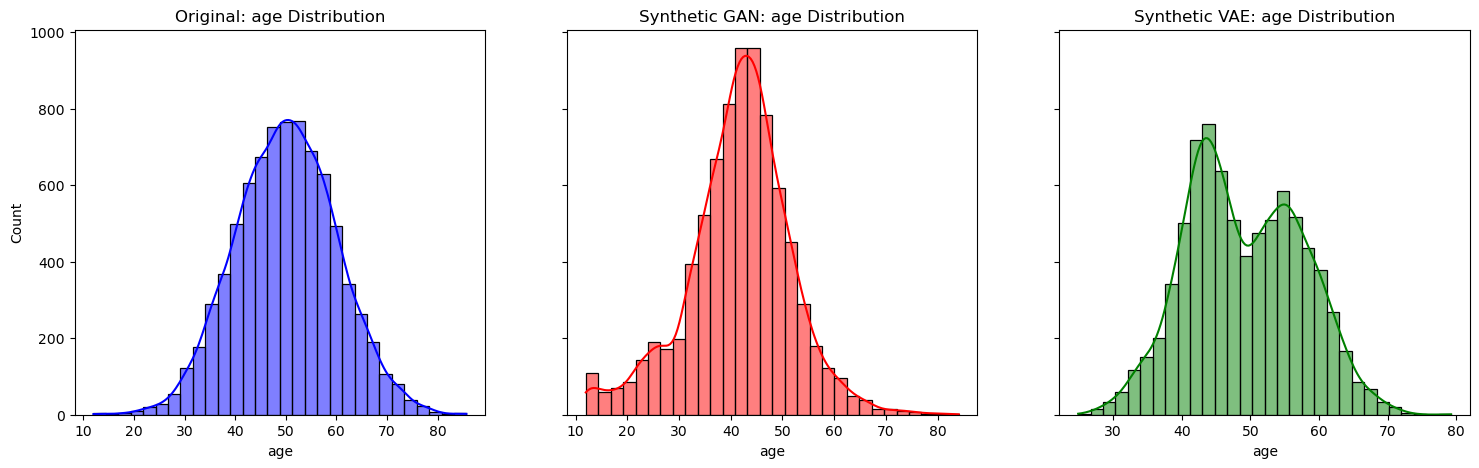

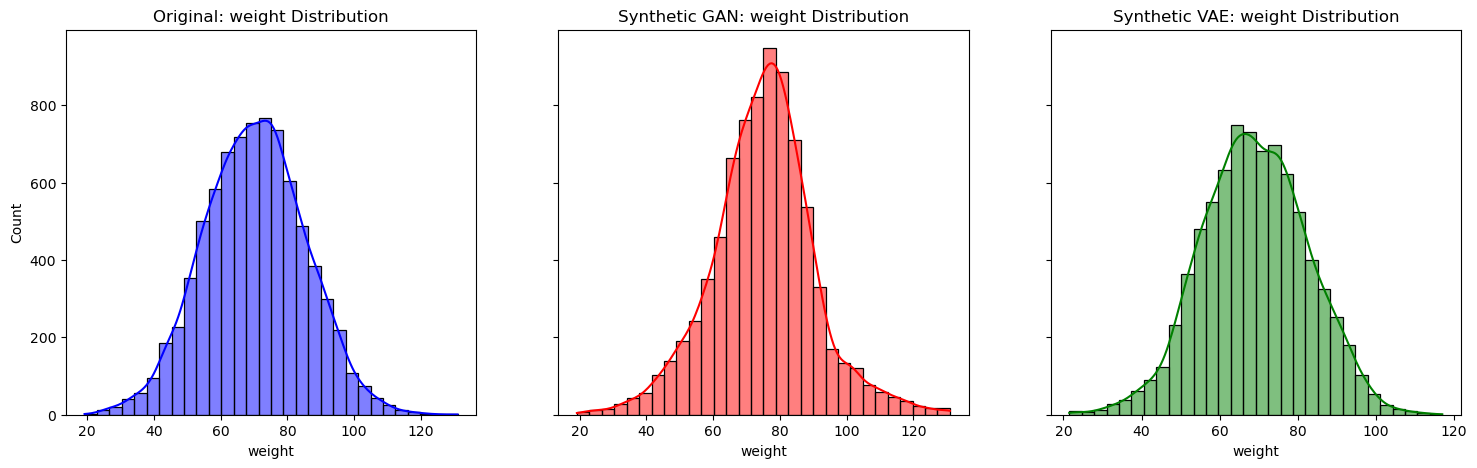

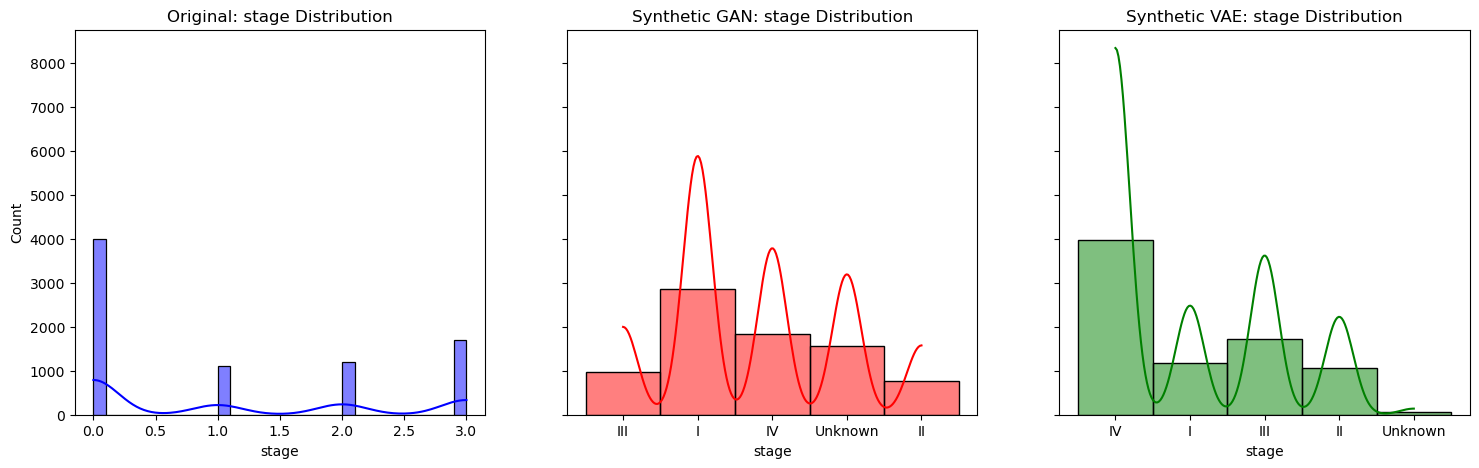

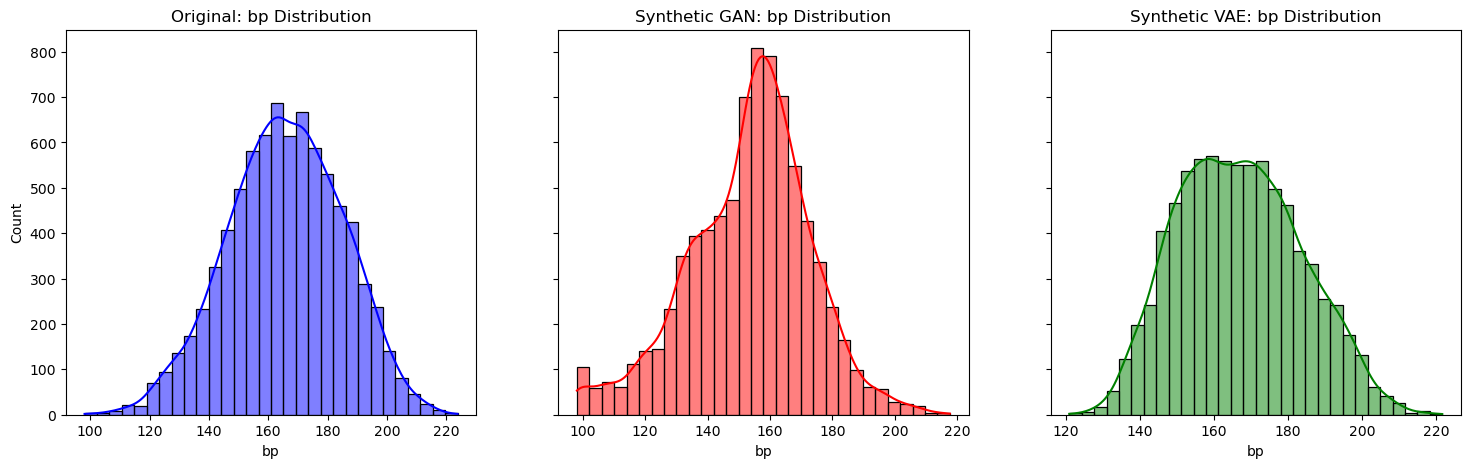

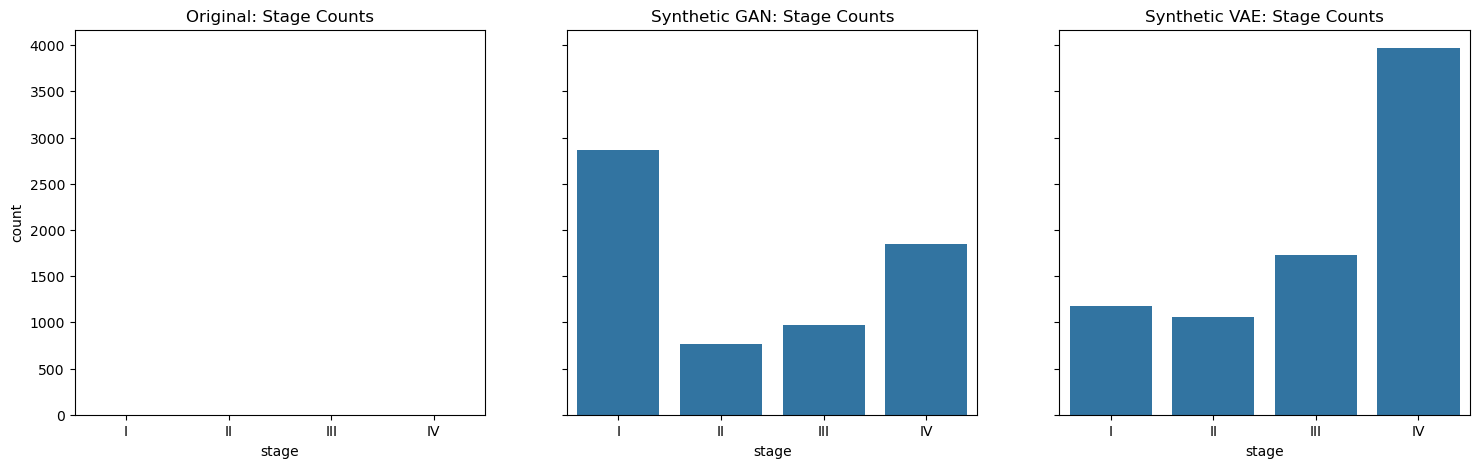

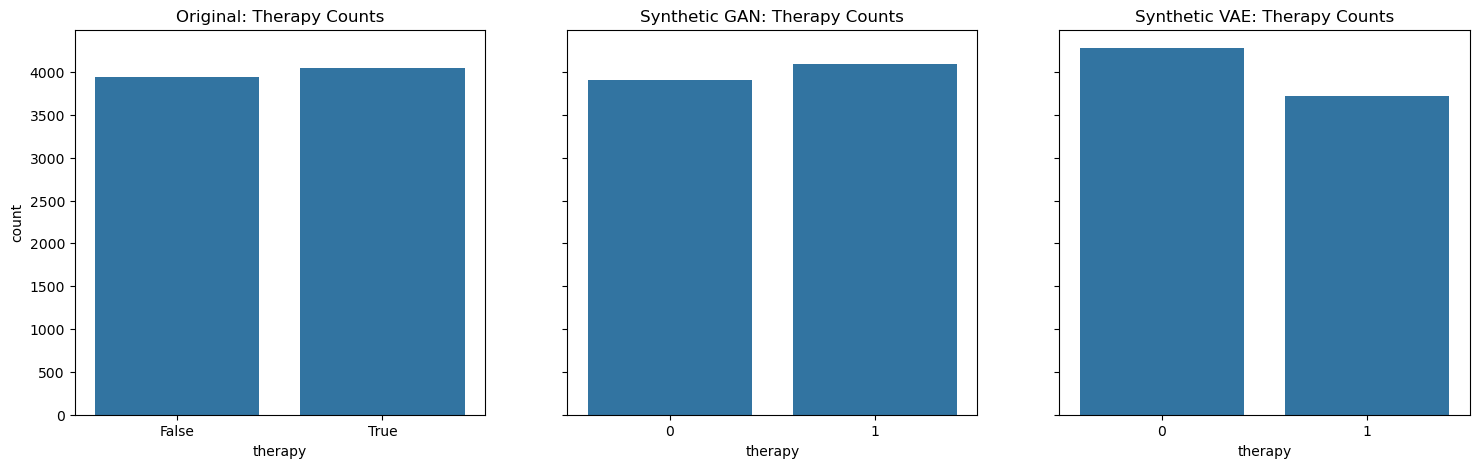

In [9]:
plot_univariate(original, synGAN, synVAE)


BIVARIATE PLOTS


c:\Users\friev\OneDrive - UGent\MaStat\Big Data Science\Big Data Algorithms\group work\Project-BDA\Comparison_plots.py:93: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()
c:\Users\friev\OneDrive - UGent\MaStat\Big Data Science\Big Data Algorithms\group work\Project-BDA\Comparison_plots.py:117: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()


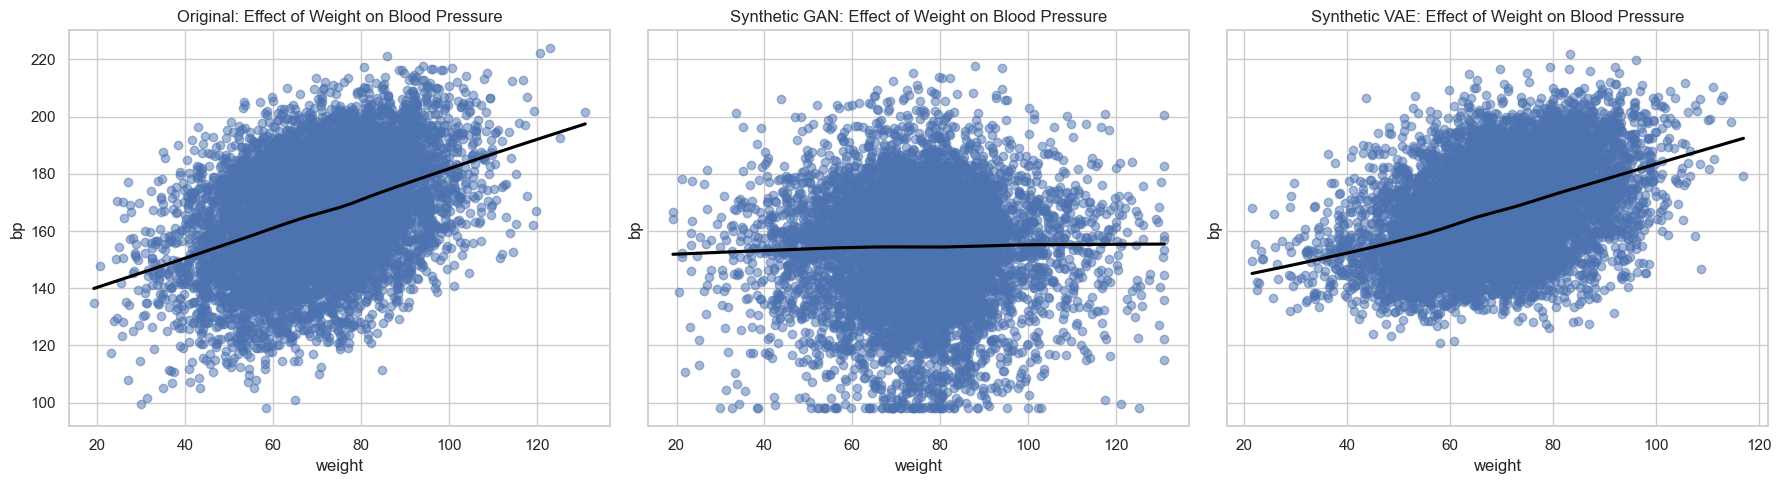

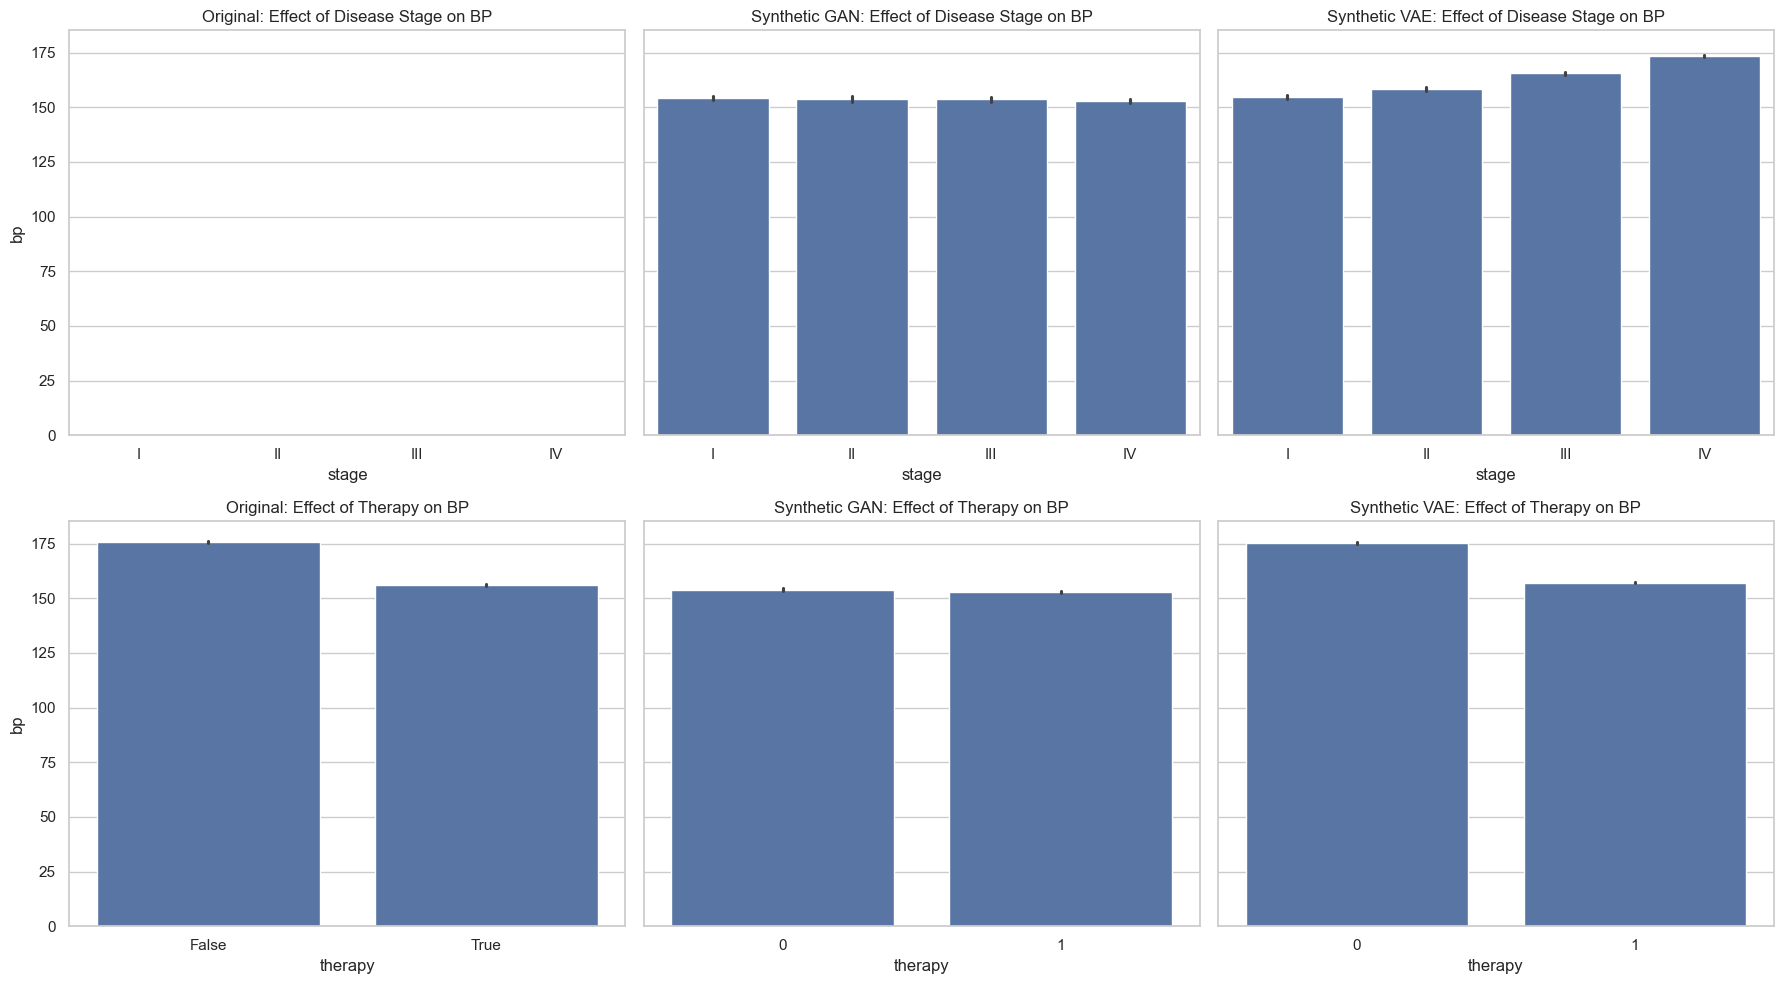

In [10]:
plot_bivariate(original, synGAN, synVAE)

In [11]:
## evaluate utility
from Utility import linear_regression, compare_models

# Run the model for original data
original = pd.read_excel(originaldir)
synGAN = pd.read_excel(syngandatadir)  #GAN
synVAE = pd.read_excel(synvaedir)

print("Model trained on ORIGINAL data:")
original = encode_categorical(original)
original_model = linear_regression(original, 'bp', test)

# Run the model for synthetic GAN data
print("\nModel trained on SYNTHETIC GAN data:")
synGAN_model = linear_regression(synGAN, 'bp', test)

# Run the model for synthetic VAE data
print("\nModel trained on SYNTHETIC VAE data:")
synVAE_model = linear_regression(synVAE, 'bp', test)

coefficients_comparison = compare_models(original_model, synGAN_model, synVAE_model, filepath )

Model trained on ORIGINAL data:
                            OLS Regression Results                            
Dep. Variable:                     bp   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     3684.
Date:                Mon, 05 May 2025   Prob (F-statistic):               0.00
Time:                        22:35:18   Log-Likelihood:                -29747.
No. Observations:                8000   AIC:                         5.951e+04
Df Residuals:                    7993   BIC:                         5.956e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        118.972

In [12]:
original = pd.read_excel(originaldir)
synGAN = pd.read_excel(syngandatadir)  #GAN
synVAE = pd.read_excel(synvaedir)

In [13]:
## evaluate privacy
mia_score = evaluate_mia(original, synGAN, test)

print(f"Membership Inference Attack Accuracy (CTGAN): {mia_score:.3f}")

targeted_f1 = evaluate_targeted_mia(original, synGAN, test)
print(f"Targeted MIA F1 Score (CTGAN): {targeted_f1:.3f}")


mia_score = evaluate_mia(original, synVAE, test)
print(f"Membership Inference Attack Accuracy (VAE): {mia_score:.3f}")

targeted_f1 = evaluate_targeted_mia(original, synVAE, test)
print(f"Targeted MIA F1 Score (VAE): {targeted_f1:.3f}")

Membership Inference Attack Accuracy (CTGAN): 0.831
Targeted MIA F1 Score (CTGAN): 0.370
Membership Inference Attack Accuracy (VAE): 0.610
Targeted MIA F1 Score (VAE): 0.446


In [14]:
# generate synthetic data
outputdatadir_GAN_worse = os.path.join(filepath, "Data", "synthetic_GAN_data_worse.xlsx")

## generate and save GAN synthetic data with less epochs
synthetic = generate_synthetic_data_GAN(df, epochs = 20)
synthetic.to_excel(outputdatadir_GAN_worse, index=False)
synGAN_worse = pd.read_excel(outputdatadir_GAN_worse)

c:\Users\friev\anaconda3\envs\BDAcourse\Lib\site-packages\sdv\single_table\base.py:126: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
c:\Users\friev\anaconda3\envs\BDAcourse\Lib\site-packages\sdv\single_table\base.py:105: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


c:\Users\friev\OneDrive - UGent\MaStat\Big Data Science\Big Data Algorithms\group work\Project-BDA\Comparison_plots.py:159: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


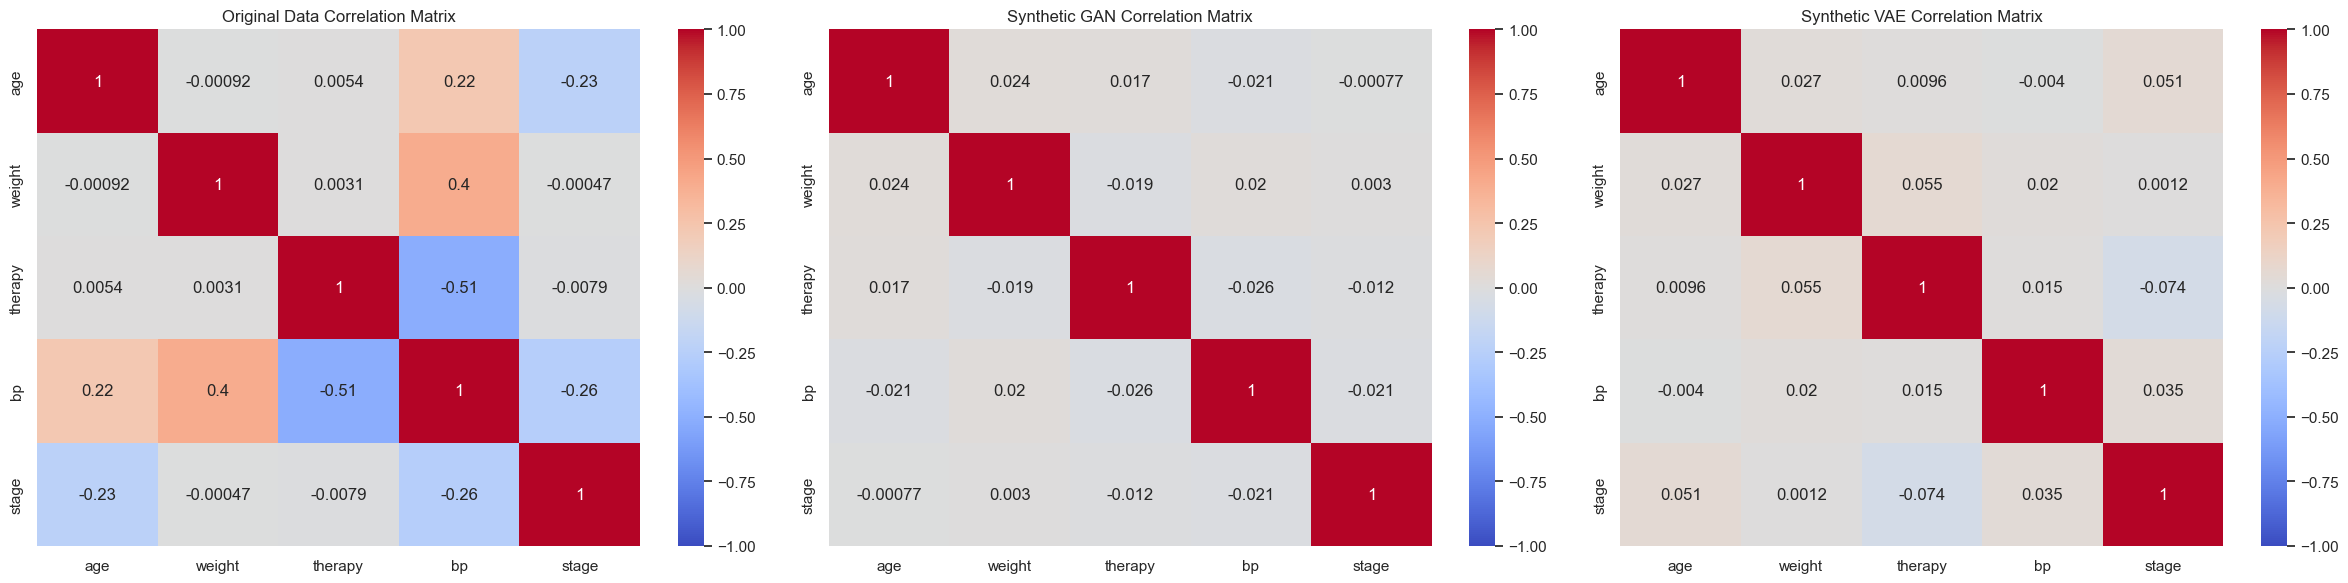

In [15]:
## evaluate similarity
compare_correlation_matrices(original, synGAN, synGAN_worse)


UNIVARIATE PLOTS


c:\Users\friev\OneDrive - UGent\MaStat\Big Data Science\Big Data Algorithms\group work\Project-BDA\Comparison_plots.py:48: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
c:\Users\friev\OneDrive - UGent\MaStat\Big Data Science\Big Data Algorithms\group work\Project-BDA\Comparison_plots.py:48: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
c:\Users\friev\OneDrive - UGent\MaStat\Big Data Science\Big Data Algorithms\group work\Project-BDA\Comparison_plots.py:48: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
c:\Users\friev\OneDrive - UGent\MaStat\Big Data Science\Big Data Algorithms\group work\Project-BDA\Comparison_plots.py:48: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
c:\Users\friev\OneDrive - UGent\MaStat\Big Data Science\Big Data Algorithms\group work\Project-BDA\Comparison_plots.py:63: UserWarning: FigureCanvasAgg is non-i

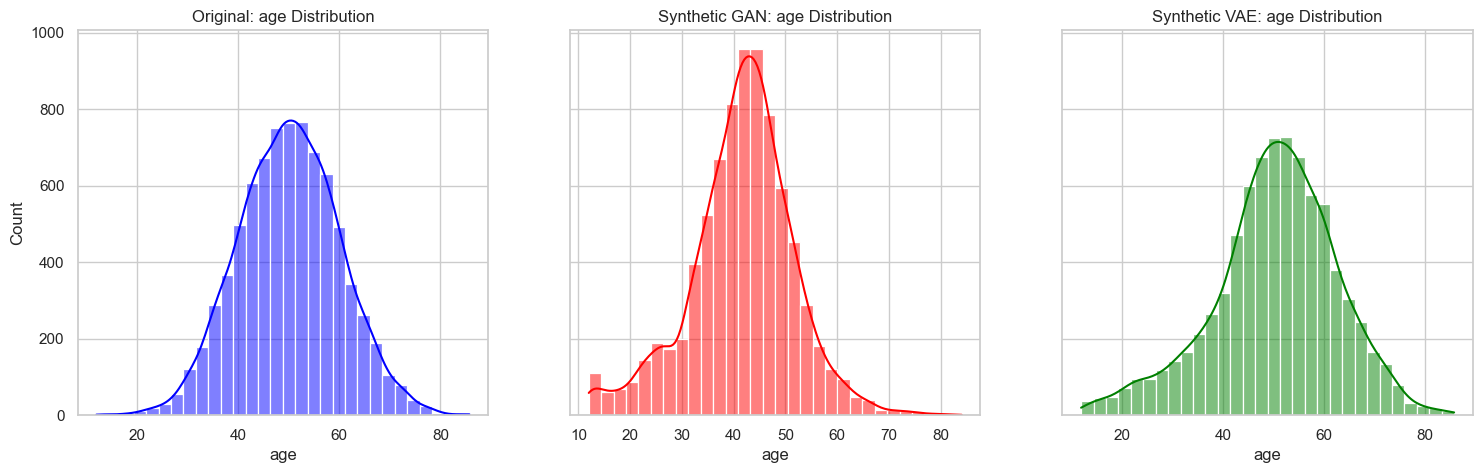

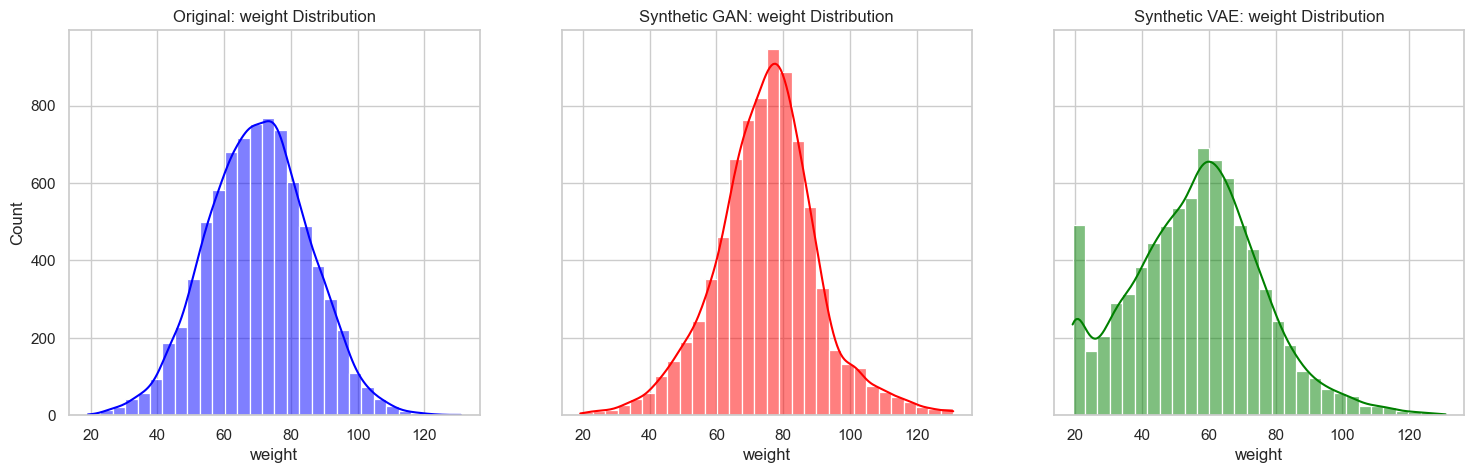

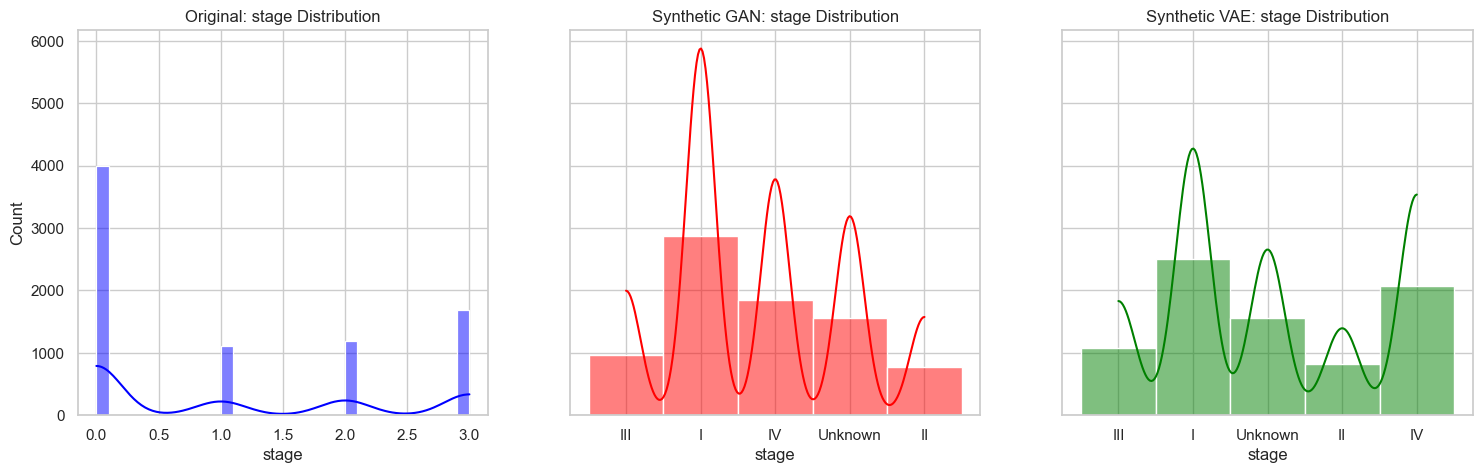

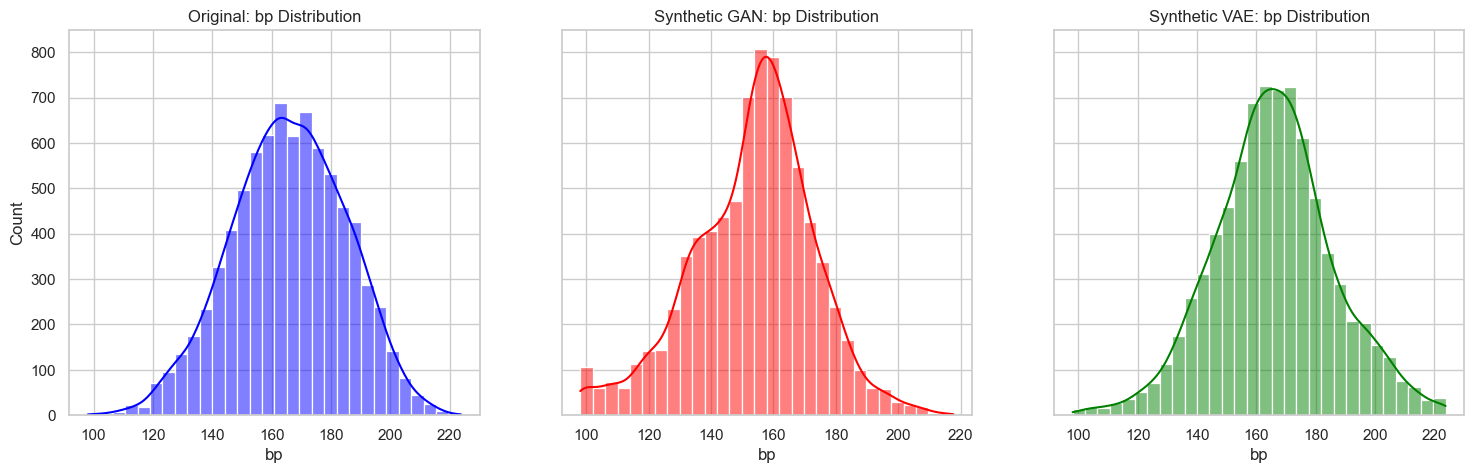

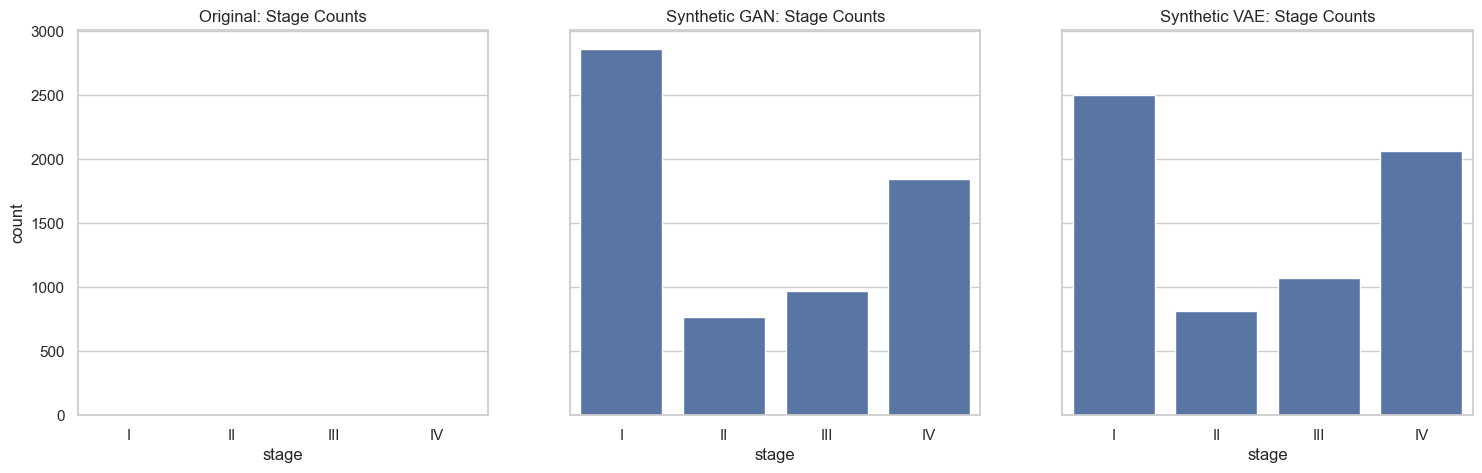

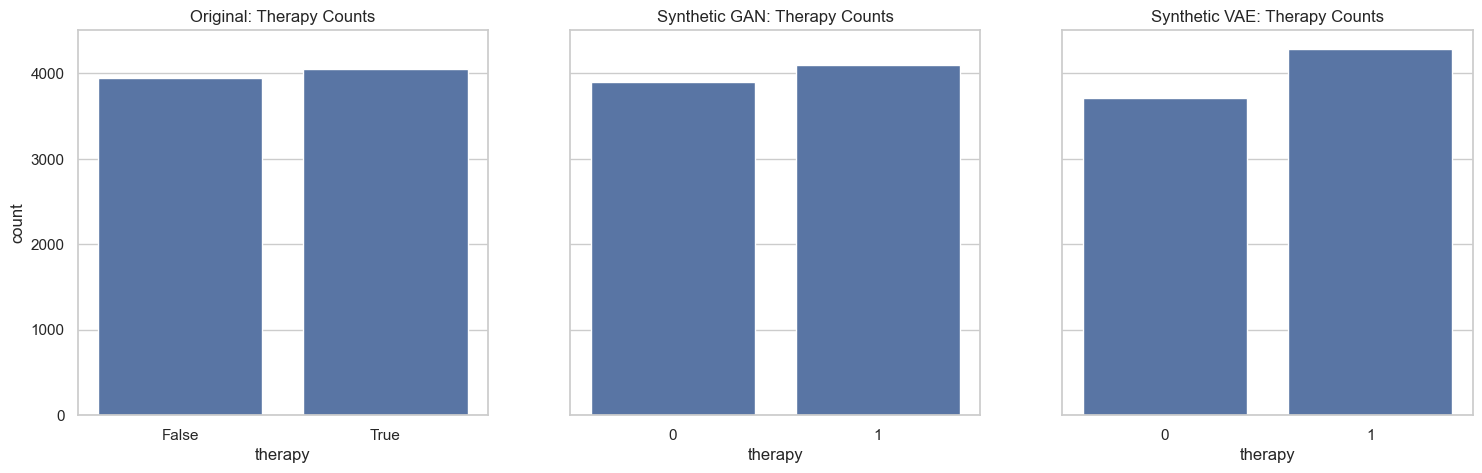

In [16]:
plot_univariate(original, synGAN, synGAN_worse)


BIVARIATE PLOTS


c:\Users\friev\OneDrive - UGent\MaStat\Big Data Science\Big Data Algorithms\group work\Project-BDA\Comparison_plots.py:93: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()
c:\Users\friev\OneDrive - UGent\MaStat\Big Data Science\Big Data Algorithms\group work\Project-BDA\Comparison_plots.py:117: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()


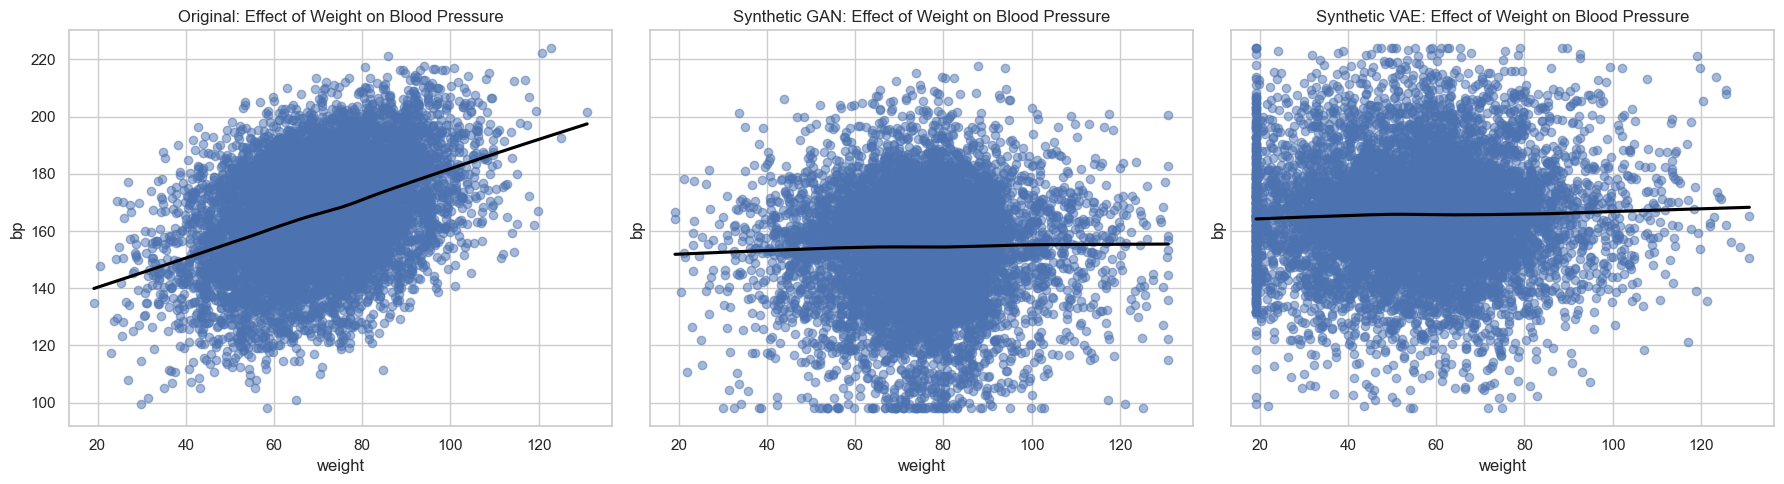

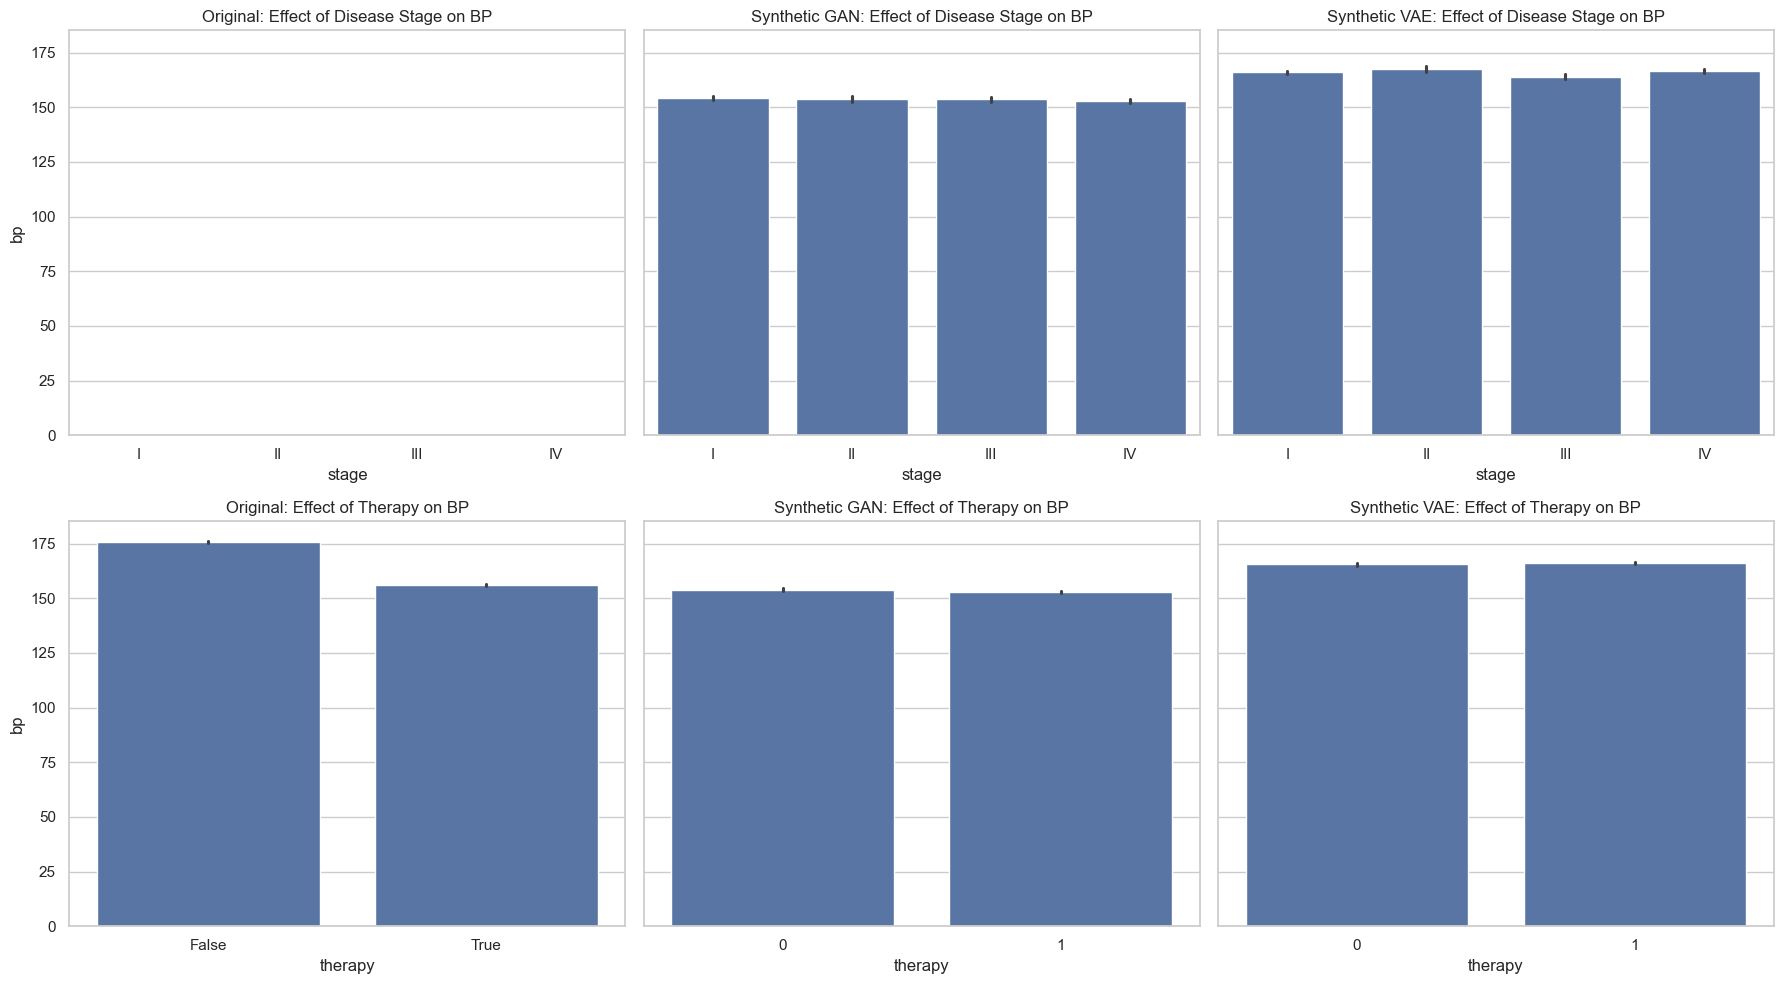

In [17]:
plot_bivariate(original, synGAN, synGAN_worse)

In [18]:

# Run the model for original data
original = pd.read_excel(originaldir)
synGAN = pd.read_excel(syngandatadir)  #GAN
synVAE = pd.read_excel(synvaedir)

In [19]:
## evaluate utility

# Run the model for original data
print("Model trained on ORIGINAL data:")
original = encode_categorical(original)
original_model = linear_regression(original, 'bp', test)

# Run the model for synthetic GAN data
print("\nModel trained on SYNTHETIC GAN data:")
synGAN_model = linear_regression(synGAN, 'bp', test)

# Run the model for synthetic VAE data
print("\nModel trained on SYNTHETIC VAE data:")
synGAN_worse_model = linear_regression(synGAN_worse, 'bp', test)

coefficients_comparison = compare_models(original_model, synGAN_model, synGAN_worse_model)

Model trained on ORIGINAL data:
                            OLS Regression Results                            
Dep. Variable:                     bp   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     3684.
Date:                Mon, 05 May 2025   Prob (F-statistic):               0.00
Time:                        22:36:52   Log-Likelihood:                -29747.
No. Observations:                8000   AIC:                         5.951e+04
Df Residuals:                    7993   BIC:                         5.956e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        118.972

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:

# Run the model for original data
original = pd.read_excel(originaldir)
synGAN = pd.read_excel(syngandatadir)  #GAN
synVAE = pd.read_excel(synvaedir)

In [ ]:
## evaluate privacy
mia_score = evaluate_mia(original, synGAN, test)

print(f"Membership Inference Attack Accuracy (CTGAN): {mia_score:.3f}")

targeted_f1 = evaluate_targeted_mia(original, synGAN, test)
print(f"Targeted MIA F1 Score (CTGAN): {targeted_f1:.3f}")


mia_score = evaluate_mia(original, synGAN_worse, test)
print(f"Membership Inference Attack Accuracy (VAE): {mia_score:.3f}")

targeted_f1 = evaluate_targeted_mia(original, synGAN_worse, test)
print(f"Targeted MIA F1 Score (VAE): {targeted_f1:.3f}")